In [28]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [29]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Deep Learning/INFY.csv")

# Extract the relevant column for prediction (e.g., "Close" price)
prices = data["Close"].values.reshape(-1, 1)

# Normalize the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [30]:
#Split the dataset into training and testing

train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [31]:
#Create the input and output sequences for training the RNN

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Define the sequence length
sequence_length = 7

# Create the training sequences
X_train, y_train = create_sequences(train_data, sequence_length)

# Create the testing sequences
X_test, y_test = create_sequences(test_data, sequence_length)

In [32]:
#Build and train the RNN model

# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6/6 [==============================] - 3s 9ms/step - loss: 0.4193
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 0.3527
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.2859
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 0.2078
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 0.1153
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0344
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0286
Epoch 8/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 9/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0168
Epoch 10/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0154


2/2 [==============================] - 0s 10ms/step


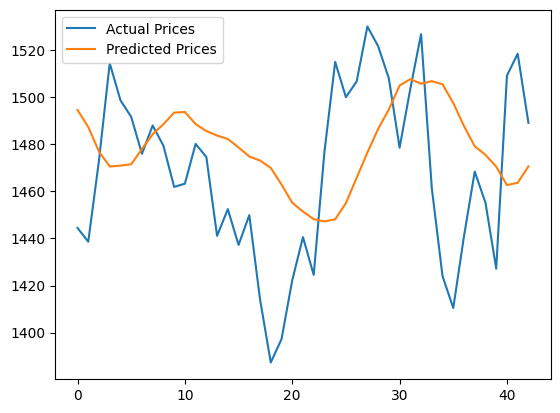

In [33]:
#Making predictions on testing dataset

predictions = model.predict(X_test)

# Inverse transform the predictions and actual prices to the original scale
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

# Visualize the predictions and actual prices
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()

In [34]:
#Predict the prices of future week

# Get the last sequence from the training data
last_sequence = train_data[-sequence_length:]

# Create the future sequence
future_sequence = []

# Predict the next day's price and append it to the future sequence
for _ in range(7):
    next_pred = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_sequence.append(next_pred[0])
    last_sequence = np.append(last_sequence[1:], next_pred[0])

# Inverse transform the future sequence to the original scale
future_prices = scaler.inverse_transform(future_sequence)

# Print the predicted prices for the next week
print("Predicted Prices for the Next Week:")
print(future_prices)

1/1 [==============================] - 0s 33ms/step
Predicted Prices for the Next Week:
[[1511.14537506]
 [1505.92656576]
 [1500.80249867]
 [1495.73631094]
 [1493.70024529]
 [1496.42838144]
 [1501.55922137]]
